# Best Way to Make Money? Data Scientists vs. Data Engineers

## **Introduction**

The digital world has become one of society’s richest resources. Many forms of data containing information such as health, security, and pollution require constant analysis and regulation, generating important strategies that can be utilized to solve urgent world problems (Sarker, 2021). The particular extraction of useful ideas from inaccessible compilations of data frames requires advanced analytical skills from both data scientists and engineers.

Due to the rapid growth of the data science field, the number of students studying data science has also been dramatically increasing, leading to increased curiosity about the field. There is no common list of skill sets which is evident by the vastly different job titles returned from job postings. 

Many studies investigated the percentage of different job titles (King, 2015), and suggested that, despite the overlap in required knowledge, data scientists and engineers have different responsibilities. A scientist cleans and wrangles data whereas an engineer develops and maintains data pipelines. However, very few analyzed the difference between the salaries of data scientists and data engineers.

Since these 2 most common positions require different roles (Ho, 2019), we want to find out if there is a significant difference in the salary mean of 2 different job titles - “Data Engineer” and “Data Scientist”, particularly if data engineers earn more than data scientists through hypothesis testing using a t-test.

We will be using the “Data Science Job Salaries” data frame by Ruchi Bhatia, collected using ai.jobs.net (Bhatia, 2021). The dataset included many aspects of data science positions and the complete description is as below. However, only “job title” and “salary_in_usd” are used to test the hypothesis.


| Title        | Description        | 
| ------------- |:-------------:| 
| work_year      | The year the salary was paid. | 
| experience_level |The experience level in the job, / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance      |     
|job_title  |The role worked in during the year.|
|salary |The total gross salary amount paid.|
|salary_currency|The currency of the salary paid as an ISO 4217 currency code.|
|salary_in_usd| The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).|
|employee_residence |Employee's primary country of residence in during the work year as an ISO 3166 country code.|
|remote_ratio|The overall amount of work done remotely, 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)|
|company_location|The country of the employer's main office or contracting branch as an ISO 3166 country code.|
|company_size|S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)|

In [56]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
salary <- read.csv("https://raw.githubusercontent.com/iorozco01/STAT201Project/main/ds_salaries.csv")

In [57]:
head(salary)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


**Table 1**

#### **Exploration Of The Job Title**

Here we explore that Data Scientists and Data Engineer job titles, like literature suggested, are in fact the most common.

In [61]:
salary_explore <- salary %>%
group_by(job_title) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))%>%
    arrange(desc(freq))

head(salary_explore)

job_title,n,freq
<chr>,<int>,<dbl>
Data Scientist,143,0.23558484
Data Engineer,132,0.21746293
Data Analyst,97,0.15980231
Machine Learning Engineer,41,0.06754530
Research Scientist,16,0.02635914
Data Science Manager,12,0.01976936


**Table 2**

We want to find out if these 2 job titles differ only by their names. Therefore, we compared other relevant variables within these 2 job titles such as experience level. 

In [62]:
scientist_EL_compare <- salary %>%
filter(job_title == "Data Scientist")%>%
group_by(job_title, experience_level)%>%
summarise(n = n())%>%
mutate(freq = n/sum(n))%>%
arrange(desc(freq))

scientist_EL_compare

`summarise()` has grouped output by 'job_title'. You can override using the
`.groups` argument.


job_title,experience_level,n,freq
<chr>,<chr>,<int>,<dbl>
Data Scientist,SE,61,0.4265734
Data Scientist,MI,60,0.4195804
Data Scientist,EN,22,0.1538462


**Table 3** 

In [63]:
engineer_EL_compare <- salary %>%
filter(job_title == "Data Engineer")%>%
group_by(job_title, experience_level)%>%
summarise(n = n()) %>%
  mutate(freq = n / sum(n))%>%
arrange(desc(freq))

engineer_EL_compare

`summarise()` has grouped output by 'job_title'. You can override using the
`.groups` argument.


job_title,experience_level,n,freq
<chr>,<chr>,<int>,<dbl>
Data Engineer,SE,63,0.47727273
Data Engineer,MI,53,0.40151515
Data Engineer,EN,12,0.09090909
Data Engineer,EX,4,0.03030303


**Table 4**

According to our sample, Data Engineer seems to require higher experitise and experience level since there are fewer entry level (**EN**) positions (15% compared to 9%). Moreover, it seems like executive level positions (**EX**) are only available for Data Engineers. This observation showed that these 2 job titles are perhaps different inherently, but we are also interested in other variables such as company size, therefore we also examined the difference between company sizes below.

In [64]:

#Data Scientist distribution throughout different company sizes form Small(S) to Large(L)

scientist_company_compare <- salary %>%
filter(job_title == "Data Scientist")%>%
group_by(job_title, company_size)%>%
summarise(n = n())%>%
mutate(freq = n/sum(n))%>%
arrange(desc(freq))


scientist_company_compare

`summarise()` has grouped output by 'job_title'. You can override using the
`.groups` argument.


job_title,company_size,n,freq
<chr>,<chr>,<int>,<dbl>
Data Scientist,M,77,0.5384615
Data Scientist,L,45,0.3146853
Data Scientist,S,21,0.1468531


**Table 5**

In [65]:
#Data Engineer distribution throughout different company sizes form Small(S) to Large(L)

engineer_company_compare <- salary %>%
filter(job_title == "Data Engineer")%>%
group_by(job_title, company_size)%>%
summarise(n = n()) %>%
  mutate(freq = n / sum(n))%>%
arrange(desc(freq))

engineer_company_compare

`summarise()` has grouped output by 'job_title'. You can override using the
`.groups` argument.


job_title,company_size,n,freq
<chr>,<chr>,<int>,<dbl>
Data Engineer,M,89,0.67424242
Data Engineer,L,37,0.28030303
Data Engineer,S,6,0.04545455


**Table 6**

In large companies, the number of data engineers and data scientists seem to be about the same, showing that large companies require both data engineers and data scientists. However, it is indeed interesting that there are fewer data engineers in smaller companies (4% compared to 14%) and more in average-sized companies (67% compared to 54%). This observation, combined with the comparison of experience level, suggested that "Data Engineer" may be a job position that is slightly more advanced than "Data Scientists". Therefore, we hypothesize that data engineers earn more than data scientists. 

The null hypothesis $H_0$: The $\mu$  of salary of data engineers = The $\mu$  of salary of data scientists 

The alternative hypothesis $H_a$: The $\mu$ of salary of data engineers $\gt$ the $\mu$  of salary of data scientists 

$\alpha$ level: 0.05

## Methods and Results

#### **Isolation of Salary by Data Scientist and Data Engineer**


 We isolate the data scientists and engineers into their own data sets as well as a joint one

In [66]:
# Created a dataframe with only data scientists and data engineers 
salaries <- salary %>%
    group_by(job_title)%>%
    filter(job_title %in% c("Data Scientist", "Data Engineer")) %>%
    select(c(job_title, salary_in_usd))

head(salaries)

job_title,salary_in_usd
<chr>,<int>
Data Scientist,79833
Data Scientist,35735
Data Scientist,51321
Data Scientist,40481
Data Scientist,39916
Data Engineer,41689


**Table 7**

In [67]:
# Created a dataframe with only data scientists 

salaries_scientists <- salary %>%
    group_by(job_title) %>%
    filter(job_title %in% "Data Scientist")%>%
    select(c(job_title, salary_in_usd))

head(salaries_scientists)

job_title,salary_in_usd
<chr>,<int>
Data Scientist,79833
Data Scientist,35735
Data Scientist,51321
Data Scientist,40481
Data Scientist,39916
Data Scientist,68428


**Table 8**

In [68]:
# Created a dataframe with only data engineers 

salaries_engineer <- salary %>%
    group_by(job_title) %>%
    filter(job_title %in% "Data Engineer")%>%
    select(c(job_title, salary_in_usd))

head(salaries_engineer)

job_title,salary_in_usd
<chr>,<int>
Data Engineer,41689
Data Engineer,47899
Data Engineer,33511
Data Engineer,74130
Data Engineer,106000
Data Engineer,112872


**Table 9**

We created a table with the means of both data scientists and data engineers to analyze them back to back to have an idea of which profession earns more on average

In [72]:

#Calculation of means of both professions as well variance with the size of both groups, n

salary_mean <- salaries %>%
    summarise(mean_salary_in_usd = mean(salary_in_usd, na.rm=TRUE),
             sd_salary_in_usd = sd(salary_in_usd, na.rm=TRUE),
             n = n()) 
head(salary_mean)    

job_title,mean_salary_in_usd,sd_salary_in_usd,n
<chr>,<dbl>,<dbl>,<int>
Data Engineer,112725.0,57629.08,132
Data Scientist,108187.8,64112.84,143


**Table 10**

We have a total number of 132 sample for Data Engineers and 143 for Data Scientist.

**Creation of bar graphs to visualize data for each individual job**

In [73]:
options(scipen = 999)

#Creation of histogram representing data scientists' salaries

scientist_hist <- salaries_scientists %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    labs(title = "Distribution of Salary for Data Scientists", subtitle = "Figure 1")

In [74]:
options(scipen = 999)

#Creation of histogram representing data engineers' salaries

engineer_hist <- salaries_engineer %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    labs(title = "Distribution of Salary for Data Engineer", subtitle = "Figure 2")


job_title,mean_salary_in_usd,sd_salary_in_usd,n
<chr>,<dbl>,<dbl>,<int>
Data Engineer,112725.0,57629.08,132
Data Scientist,108187.8,64112.84,143


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



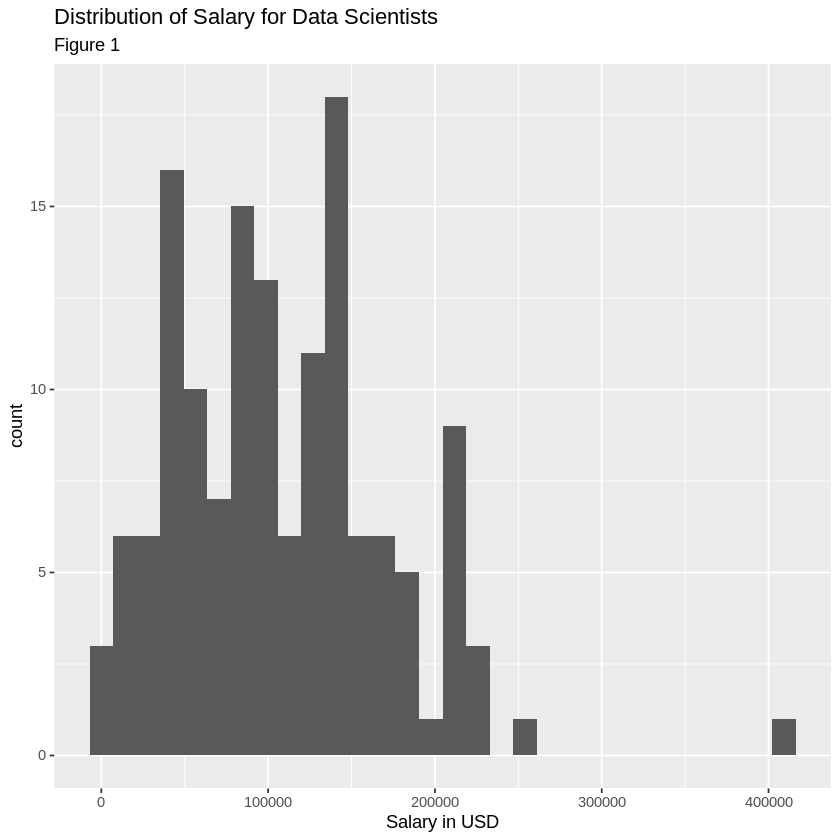

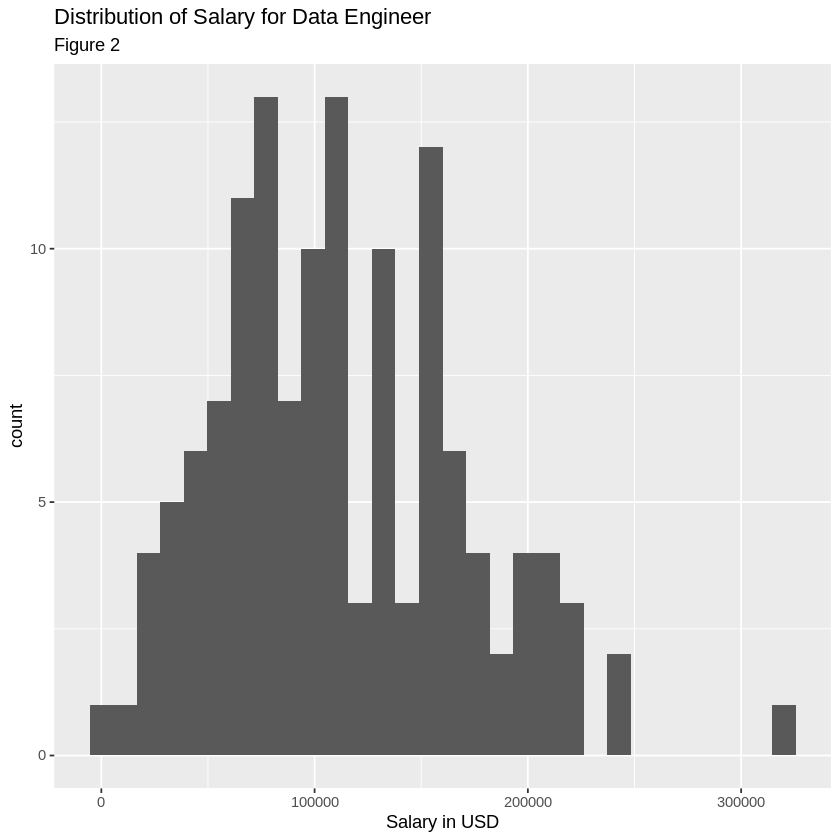

In [75]:
head(salary_mean)
par(mfrow = c(2,1))
scientist_hist
engineer_hist        

The distribution of salaries from both titles seem to be unimodel. Both distribution seems to show a normal distribution, with a few outliers earning high income beyond 300000  and 400000. These outliers, however, will likely not impact the difference in mean since these outliers exist in both distributions.

#### **Graphing Salaries of Data Engineer and Data Scientists**

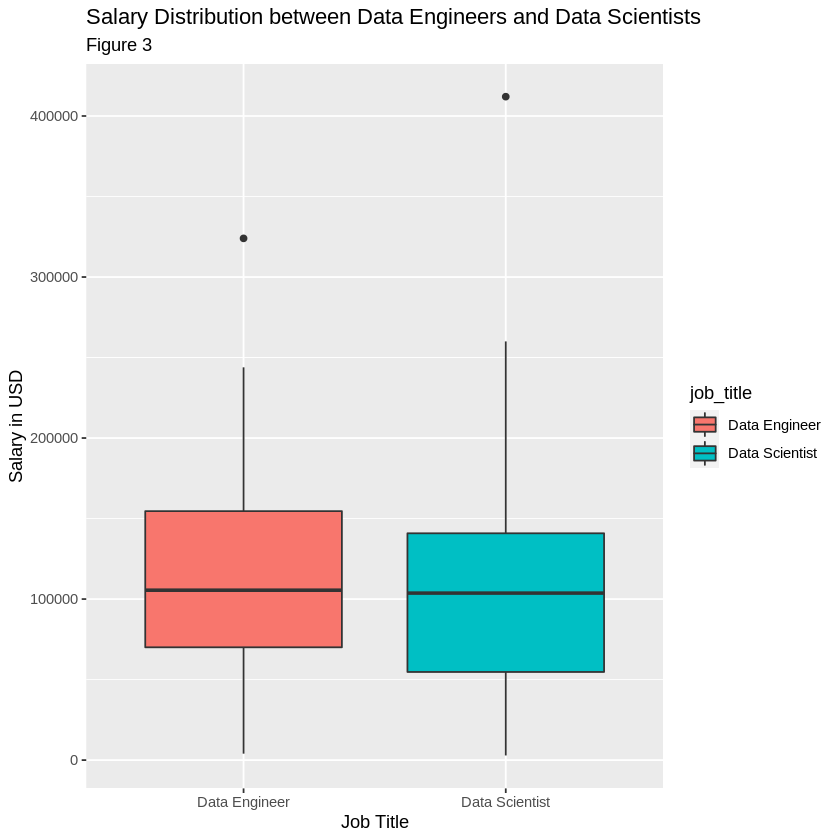

In [77]:

#Creation of side by side boxplots for a clearer visual difference between the salary mean of both groups.

options(scipen = 999)
salary_boxplots <- 
    ggplot(data = salaries, mapping = aes(x = job_title, y = salary_in_usd, fill = job_title)) +                                                       
    geom_boxplot() + 
    xlab("Job Title") +
    ylab("Salary in USD") + 
    labs(title = "Salary Distribution between Data Engineers and Data Scientists", subtitle = "Figure 3")

salary_boxplots

As explained above, the outliers likely will not impact our result greatly. Thus, for easier visualization of the box plot and normal distribution, they will be removed in the next step. 

In [78]:

#scientists and engineers with outlier removed

s_removed <- salary %>%
    group_by(job_title)%>%
    filter(job_title %in% c("Data Scientist", "Data Engineer")) %>%
    select(c(job_title, salary_in_usd))%>%
    filter(salary_in_usd < 300000)

head(s_removed)

job_title,salary_in_usd
<chr>,<int>
Data Scientist,79833
Data Scientist,35735
Data Scientist,51321
Data Scientist,40481
Data Scientist,39916
Data Engineer,41689


**Table 11**

In [79]:
#scientists with outlier removed

s_scientists <- salaries_scientists %>%
   filter(salary_in_usd < 300000)
head(s_scientists)

job_title,salary_in_usd
<chr>,<int>
Data Scientist,79833
Data Scientist,35735
Data Scientist,51321
Data Scientist,40481
Data Scientist,39916
Data Scientist,68428


**Table 12**

In [80]:

#engineers with outlier removed

s_engineer <- salaries_engineer %>%
    filter(salary_in_usd < 300000)
head(s_engineer)

job_title,salary_in_usd
<chr>,<int>
Data Engineer,41689
Data Engineer,47899
Data Engineer,33511
Data Engineer,74130
Data Engineer,106000
Data Engineer,112872


**Table 13**

Here we created 3 datasets with the outliers removed since both data sets have just one person with a salary over 300000. We remove the outlier to get a tighter distribution

#### **Graphing Salaries of Data Scientists and Data Engineers with Outliers Removed**

We create a second version of the boxplots to remove the outliers and get a more concise data set and narrower distribution.

In [83]:
#Mean calculation for both groups without the outliers

salary_mean_filtered <- s_removed %>%
    summarise(mean_salary_in_usd = mean(salary_in_usd, na.rm=TRUE)) 

head(salary_mean_filtered)

job_title,mean_salary_in_usd
<chr>,<dbl>
Data Engineer,111112.2
Data Scientist,106048.3


**Table 14**

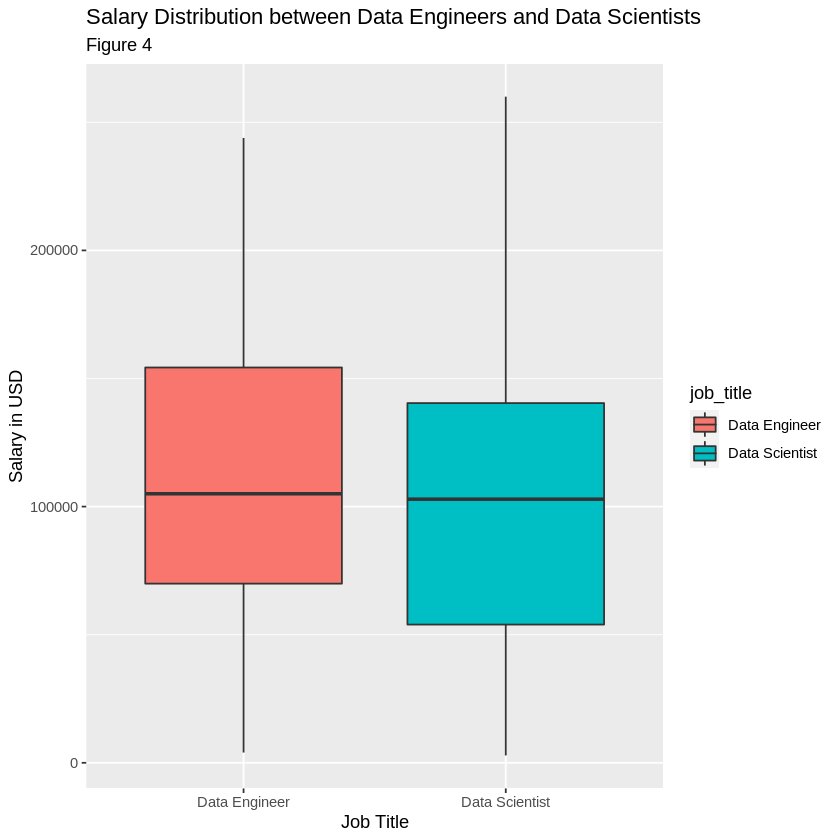

In [84]:

options(scipen = 999)

#Regraphing of boxplots with updated groups

salary_boxplots_filtered <- 
    ggplot(data = s_removed, mapping = aes(x = job_title, y = salary_in_usd, fill = job_title)) +                                                       
    geom_boxplot() + 
    xlab("Job Title") +
    ylab("Salary in USD") + 
    labs(title = "Salary Distribution between Data Engineers and Data Scientists", subtitle = "Figure 4")

salary_boxplots_filtered

#### **Bootstrap**

A bootstrap is then performed to find the confidence interval of said bootstrap in order to calculate its accuracy when compared to the inspection of the asymptotic data.

In [85]:
set.seed(1)

#Data Scientist bootstrap

scientists_bootstrap <- s_scientists %>%
    rep_sample_n(size = 132, reps = 1000, replace = TRUE)%>%
    select(c(job_title, salary_in_usd))

head(scientists_bootstrap)

Adding missing grouping variables: `replicate`


replicate,job_title,salary_in_usd
<int>,<chr>,<int>
1,Data Scientist,136620
1,Data Scientist,205300
1,Data Scientist,90734
1,Data Scientist,21669
1,Data Scientist,4000
1,Data Scientist,138600


**Table 15**

In [86]:
#Data Engineer bootstrap

engineers_bootstrap <- s_engineer %>%
    rep_sample_n(size = 143, reps = 1000, replace = TRUE) %>%
    select(c(job_title, salary_in_usd))

head(engineers_bootstrap)

Adding missing grouping variables: `replicate`


replicate,job_title,salary_in_usd
<int>,<chr>,<int>
1,Data Engineer,21637
1,Data Engineer,45807
1,Data Engineer,111775
1,Data Engineer,154000
1,Data Engineer,175000
1,Data Engineer,156600


**Table 16**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



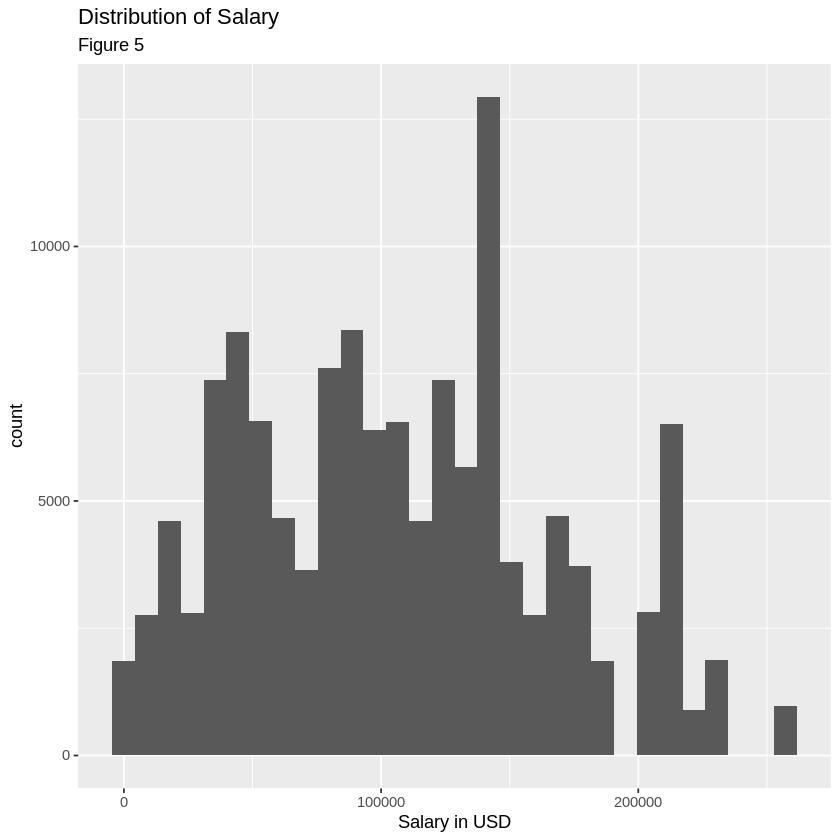

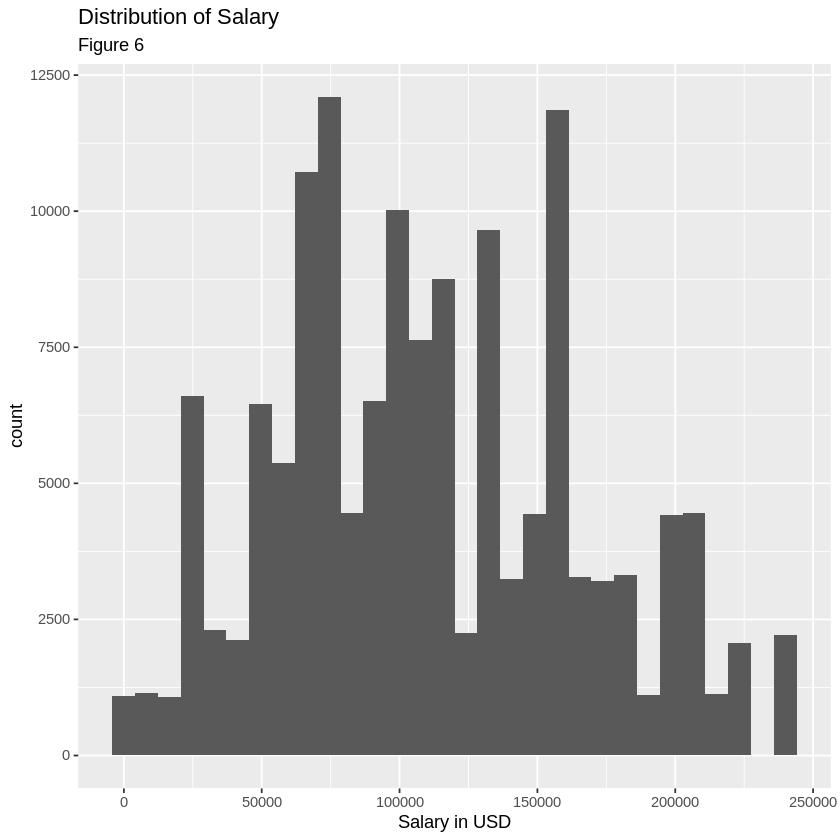

In [87]:

#Histogram for data scientist bootstrap

scientists_boot_hist <- scientists_bootstrap %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    labs(title = "Distribution of Salary", subtitle = "Figure 5")

#Histogram for data engineer bootstrap

engineers_boot_hist <- engineers_bootstrap %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    labs(title = "Distribution of Salary", subtitle = "Figure 6")


scientists_boot_hist
engineers_boot_hist

#### **Confidence Interval Bootstrapping**

In [88]:
set.seed(1)

#Here we set the confidence level at .95 to match with the 0.05 alpha level 

#Confidence Interval for data scientists bootstrap

bootstrap_scientists_ci <- scientists_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

head(bootstrap_scientists_ci)

lower_ci,upper_ci
<dbl>,<dbl>
9466,220000


**Table 17**

In [89]:
#Confidence Interval for data engineers bootstrap

bootstrap_engineers_ci <- engineers_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

head(bootstrap_engineers_ci)

lower_ci,upper_ci
<dbl>,<dbl>
21637,220110


**Table 18**

#### **Confidence Interval Asymptotics**

In [90]:
set.seed(1)

#Calculating CI for data engineers


engineers_mean <- mean(s_engineer$salary_in_usd, na.rm = TRUE)
engineers_std_error <- sd(s_engineer$salary_in_usd, na.rm = TRUE)/sqrt(length(s_engineer))

engineers_ci <- s_engineer %>%
    tibble(
    lower_ci = qnorm(0.025, engineers_mean, engineers_std_error),
    upper_ci = qnorm(0.975, engineers_mean, engineers_std_error)) %>%
    select(lower_ci, upper_ci)

head(engineers_ci, 1)

lower_ci,upper_ci
<dbl>,<dbl>
35194.6,187029.8


**Table 19**

In [91]:
set.seed(1)

#Calculating CI for data scientists

scientists_mean <- mean(s_scientists$salary_in_usd, na.rm = TRUE)
scientists_std_error <- sd(s_scientists$salary_in_usd, na.rm = TRUE)/sqrt(length(s_scientists))

scientists_ci <- s_scientists %>%
    tibble(
    lower_ci = qnorm(0.025, scientists_mean, scientists_std_error),
    upper_ci = qnorm(0.975, scientists_mean, scientists_std_error)) %>%
    select(lower_ci, upper_ci)

head(scientists_ci, 1)

lower_ci,upper_ci
<dbl>,<dbl>
24287.32,187809.3


**Table 20**

We performed a CI for both the asymptotic and the bootstrap in order to compare the results and see if the CI for bootstrapping was both accurate and trustworthy when compared to the original data

#### **Hypothesis Testing Using Bootstrap**

In [92]:
#Calculate the observed statistic

observed_statistic <- s_removed %>%
  specify(salary_in_usd ~ job_title) %>%
  calculate(stat = "diff in means", order = c("Data Engineer", "Data Scientist"))

observed_statistic

stat
<dbl>
5063.904


**Table 21**

In [93]:
set.seed(1)

#Computed the bootstrap hypothesis test using the infer package 

test_bootstrap <- s_removed %>%
    specify(salary_in_usd ~ job_title) %>%
    hypothesise(null = "independence") %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Data Engineer", "Data Scientist"))%>%
    get_p_value(obs_stat = observed_statistic, direction = "right")

head(test_bootstrap)

p_value
<dbl>
0.513


**Table 22**

P-value conducted using bootstrap hypothesis testing is $p = .513$, and since our $\alpha$ level is set at 0.05, the difference is insignificant here. Although we conducted a bootstrap hypothesis testing \due to criterium requirement\, it is not approperiate here since we are calculating "diff in means", and permutation method is a better choice for resampling hypothesis testing in this case, which will be conducted below along with t-test. 

#### **T- test - Theories**

The conditions for a T-test is met since the measured values are on a ratio scale. The sample size as explored in count_salaries is also sufficiently large for comparison (132 and 143). Although the variance is unequal, they are independently collected through random sampling, and both distributions follow an approximately normal distributions. The criterium for a T-test has been met. Thus we are able to conduct t-test for this particular sample.

In [94]:
set.seed(1)

t.test(s_scientists$salary_in_usd, s_engineer$salary_in_usd, alternative = "less", var.equal = FALSE)

#Computed the bootstrap hypothesis test using the infer package 

test_bootstrap <- s_removed %>%
    specify(salary_in_usd ~ job_title) %>%
    hypothesise(null = "independence") %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Data Engineer", "Data Scientist"))



	Welch Two Sample t-test

data:  s_scientists$salary_in_usd and s_engineer$salary_in_usd
t = -0.7354, df = 270.99, p-value = 0.2314
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 6301.244
sample estimates:
mean of x mean of y 
 106048.3  111112.2 


Sample t-test: $p = .2314$

There was no significant difference in salaries between scientists ($M = 106048.3$) and Engineer $(M = 111112.2), t(270.99) = -.7354, p = .2314.$ However, the p-value done using the t-test is slightly smaller than the hypothesis test done using bootstrap $p = .513$. Overrall, the difference between the two groups is not significant.

#### **T-Test - Permute**

In [51]:
set.seed(1)
diff_salaries <- s_removed %>%  
    specify(salary_in_usd ~ job_title) %>%
    hypothesize (null = "independence") %>%
    generate(type = "permute", reps = 1000) %>%
    calculate(stat = "diff in means", order = c("Data Engineer", "Data Scientist"))

head(diff_salaries)

replicate,stat
<int>,<dbl>
1,-12462.5435
2,-8852.8882
3,2679.6227
4,-6217.3273
5,5459.8874
6,460.8703


**Table 23**

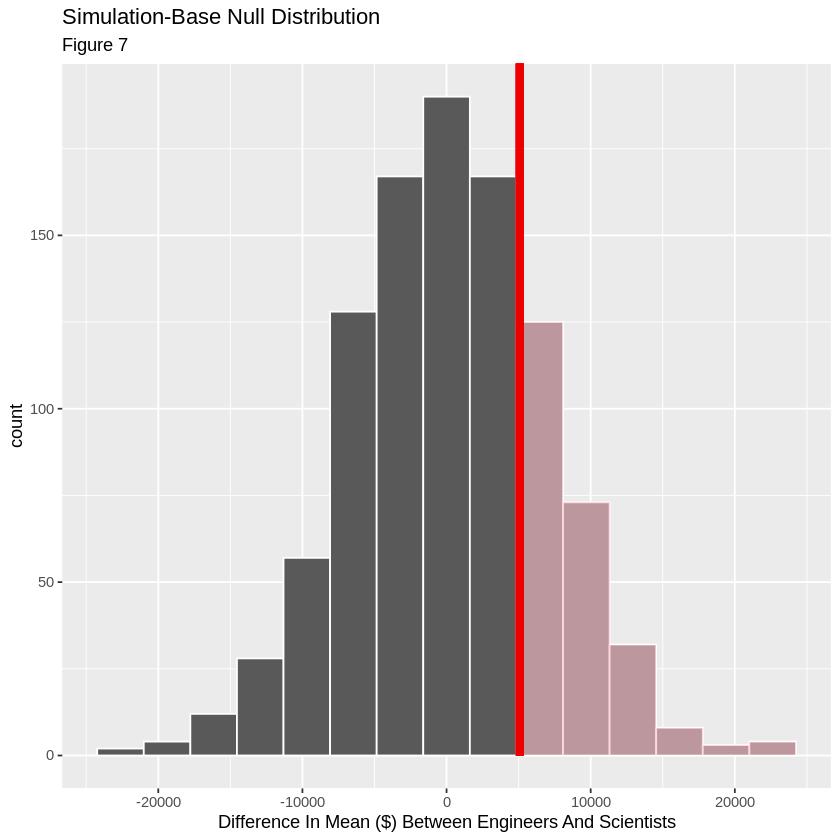

In [95]:

#Plot the distribution of the null model and indicated the location of the p_value of the observed test statistic

permute_distribution <- 
   diff_salaries %>%
   visualize() + 
    labs(title = "Simulation-Base Null Distribution", subtitle = "Figure 7") + 
    xlab("Difference In Mean ($) Between Engineers And Scientists") +
   shade_p_value(obs_stat = observed_statistic, direction = "right")

permute_distribution

In [96]:
# calculate the p value from the null model
p_value_salary <- diff_salaries %>%
  get_p_value(obs_stat = observed_statistic,
              direction = "right")

p_value_salary

p_value
<dbl>
0.234


**Table 24**

Here we see that the p-value calculated from the infer package $p = .234$ is very similar to the one calculated using t.test $p = .2314$. Overrall, the permute method is more generalizable because it is more exact and does not need the work under the assumption that the distribution is normal. However, our distributions are seemingly normal with very similar results in both tests, and, despite the increased reliability of the permutation test, t-test is easier to conduct, meaning that both have advantages and there is no strong preference to choose one over the other.

### **Discussion:**

_Summarize what you found, and the implications/impact of your findings._

Data engineers (𝑀=106048.3, SD=57629.08) have a slightly higher mean salary than data scientists (𝑀=106048.3, SD=64112.84) according to the sample. At the same time, we noticed that although both of them are equally required in large companies, data engineers are required more in medium size companies and less in small-size companies compared to data scientists. In addition, we studied the experience level between the two job positions, and data scientists are more likely to be entry-leveled (EN) and only data engineers have executive-level positions (EX).
Overall, data engineer positions seem to be more advanced and require higher experience levels than data scientist positions. However, the income gap between the two jobs is not significant here using both the permutation test and theory t-test. 
Based on the information, data scientists seem to be a better career choice for new graduates since they have more entry-level positions and the same mean salaries as data engineers. However, it appears that data engineers can advance to executive (EX) level positions, which could be interpreted as data engineers having more space for growth in a business than data scientists. For ambitious students, the similarity in mean salaries can often be ignored since executive positions hold higher incomes that are outliers to the salary distribution, which are more likely to come across as data engineers. These key insights provide students with potential references as to which job position is more suitable according to their needs.
 
 
_If relevant, discuss whether your results were what you expected to find._

We hypothesized that data engineers’ salaries will be higher than that of data scientists, because data scientist positions seem to be more entry-leveled with less prevalence in larger companies, requiring less expertise than data engineers. However, the alternative hypothesis is not supported here as there is no significant difference between the scientists (𝑀=106048.3) and the engineers (𝑀=111112.2), 𝑡(270.99)=−.7354, 𝑝=.2314.

_Discuss future questions/research this study could lead to._

This surprising result could imply that data engineer positions may require less tedious work or work hours than data scientists, which raises the question of the work time difference between these 2 careers. This further research can provide an answer as to why, despite more experience required, data engineers earn approximately the same as data scientists. 
Moreover, the salary difference between North America and Europe can also serve as an alternative question that helps students to determine which location is better for their prospective career growth. 

_Some limitations:_

The sample should be more centralized in North America since the country is a key player in salary differences. Keeping the same location and work type can isolate the effect of the job titles (data engineer and data scientist) on salaries and can help us to generate a stronger conclusion. Moreover, the sample size, although sufficiently large for the t-test, is still relatively small compared to the population since the sampling took place across the globe. Thus, the result discovered in this report can be attributed solely to the randomness of sampling and may not be a good representation of the 2 entire populations.   


## **References**

Sarker, I.H. Data Science and Analytics: An Overview from Data-Driven Smart Computing, Decision-Making and Applications Perspective. SN COMPUT. SCI. 2, 377 (2021). https://doi.org/10.1007/s42979-021-00765-8

King, John, and Roger Magoulas. 2015 data science salary survey. O'Reilly Media, Incorporated, (2015). http://www.eli.sdsu.edu/courses/fall16/cs696/2015-data-science-salary-survey.pdf

Ho, Andy, et al. "A data science approach to defining a data scientist." SMU Data Science Review 2.3 (2019): 4. https://scholar.smu.edu/datasciencereview/vol2/iss3/4/
 Bhatia, Ruchi. “Data Science Job Salaries”, Kaggle (2021)
 
University Virginia. “Data Science VS Data Engineering.” School of Data Science, 23 Sept. 2021, https://datascience.virginia.edu/news/data-science-vs-data-engineering. 

Willems, Karlijn. “Data Scientist vs Data Engineer.” DataCamp, DataCamp, 23 Feb. 2017, https://www.datacamp.com/blog/data-scientist-vs-data-engineer. 
